<a href="https://colab.research.google.com/github/gkjunior/machine_learning_sklearn_keras_tf2/blob/main/00_Zweite_erste_schritte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Die Anfänge:
# wieder mit Housing. Als erstes ein working directory anlegen und das file downloaden.

#### ZielVar wird der mittlere Hauswert sein.


import os
import tarfile
import urllib.request
import glob

print(os.getcwd() +' :'+ str('GoogleColab-Home-Verzeichnis'))

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Funtion zum fetchen der URL:

def fetch_url(url_file = HOUSING_URL, path_file = HOUSING_PATH):
  """
  Funktion zum abgreifen von Files aus dem Github
  Erstellt wenn nötig das Verzeichnis und entpackt das file drin.
  """
  os.makedirs(path_file, exist_ok = True)
  tgz_path = os.path.join(path_file, "housing.tgz")
  urllib.request.urlretrieve(url_file, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = path_file)
  housing_tgz.close()
  print(f"Datei entpackt in {glob.glob(tgz_path)}")

fetch_url()


/content :GoogleColab-Home-Verzeichnis
Datei entpackt in ['datasets/housing/housing.tgz']


In [2]:
# Das File reinladen und kurz analysieren

import pandas as pd

housing = pd.read_csv(HOUSING_PATH + str("/housing.csv"))
print(housing.head(10))
print() #Platzhalter
print(len(housing)) # Einträge

# Ocean proximity ist klasse?
# genauer ins Set gucken

   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY
5    -122.25     37.85  ...            269700.0         NEAR BAY
6    -122.25     37.84  ...            299200.0         NEAR BAY
7    -122.25     37.84  ...            241400.0         NEAR BAY
8    -122.26     37.84  ...            226700.0         NEAR BAY
9    -122.25     37.84  ...            261100.0         NEAR BAY

[10 rows x 10 columns]

20640


In [3]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing['ocean_proximity'].value_counts()

# Kat Merkmal mit 5 Ausprägungen

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.info()

## total bedrooms hat weniger Einträge: Genauer angucken

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


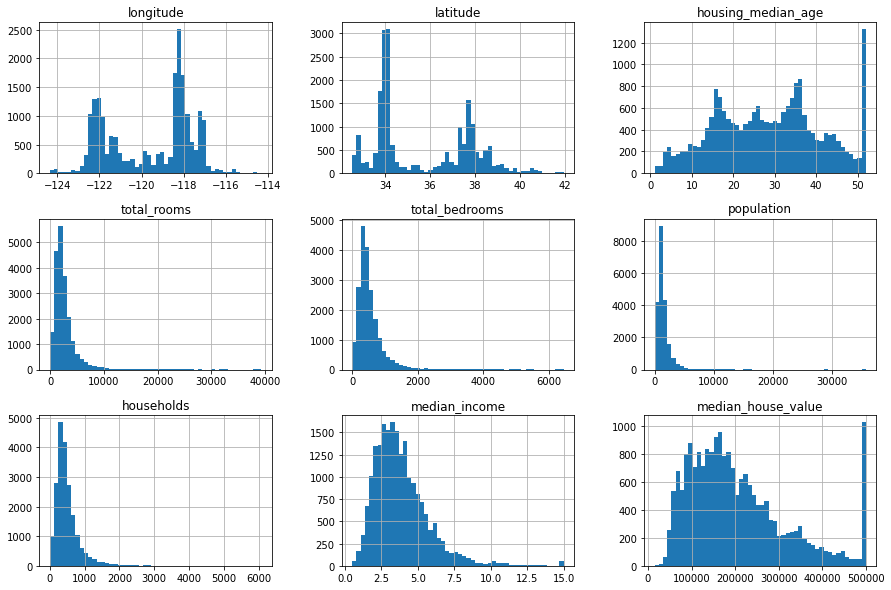

In [7]:
# plotten
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize= (15,10)) # leserlich auf chromebook
plt.show()

In [8]:
# Kleine Notes:

# long und lat daten: Könnte man ja eigentlich plotten um eine tatsächliche Karte darzustellen? eventl. heatmap
# Housing Median Age genauer anschauen, da Bezirksdaten.
# total_rooms, total_bedrooms, pop, households, median_income, median_house_value -> rechtsschief: eventl log-transfo/boxcox/Yeo - je nachdem im Detail.
# die ersten 3 sind multimodal, da stecken mit sicherheit eigene Klassen drin. Macht auch Sinn, da Regionsinfo in Long und Lat und Altersklassen.
# Median Income hat unheimlich niedrige Werte. Im Buch wird sicher noch herauskommen, dass eine 3 nicht für 3$ sondern wahrscheinlich eine Tk Transformation ist.
# Generell müssen die Wertebereiche skaliert werden, sie gehen von 0 - 500k.

# // Edit Buch: Jap, Income steht für x*10.000


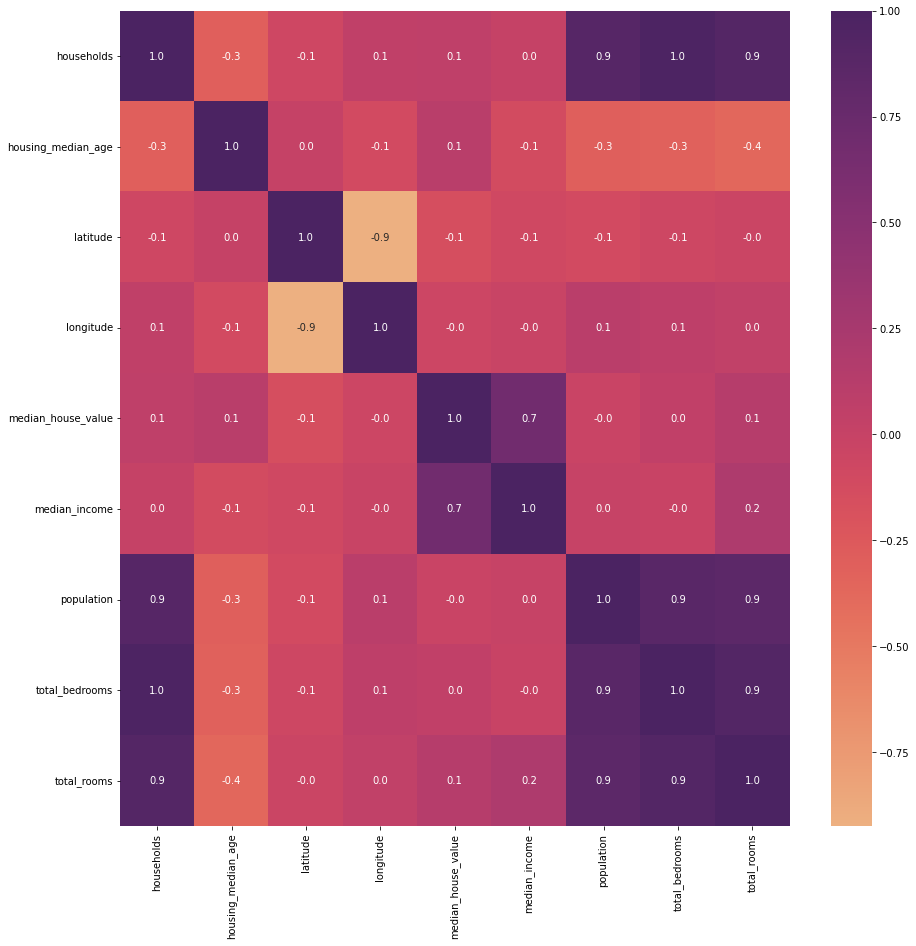

In [9]:
# Multicolin check:

import seaborn as sns

cat_vars = []
for col, value in housing.iteritems():
    if value.dtype == 'object':
        cat_vars.append(col)

df_cat = housing[cat_vars]
# Store the numerical columns in a list numerical
numerical = housing.columns.difference(cat_vars)

#print("\n numerical:" , numerical)
df_num= housing[numerical]
# df_cat.head(
plt.figure(figsize=(15,15))
sns.heatmap(df_num.corr(),annot=True ,cmap='flare',fmt= '.1f')
plt.show()

In [10]:
# Schön wenn Ziel Median_House_value sein soll, ist dort eine geringe Korrelation zu finden.
# Dafür wird es probleme zwischen households, pop, total_bedrooms und total rooms geben.
# Schauen wir mal mit scaling und transformation was wir verbessern können, dennoch die multicolin der o.g. vars im Auge behalten.
# Einmal den VIF kalken: (Varianz-Inflations-Faktor):

In [11]:
# VIF:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# datenset ohne ocean; long;lat erstellen:
temp_df = housing.iloc[:,2:-1]

# schnell NAs rausnehmen:
temp_df = temp_df.dropna()

# Vif erstellen:

vif_df = pd.DataFrame()
vif_df['Features'] = temp_df.columns

# VIF für jedese feature
vif_df["VIF"] = [variance_inflation_factor(temp_df.values, i)
                          for i in range(len(temp_df.columns))]
  
print(vif_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


             Features        VIF
0  housing_median_age   3.832552
1         total_rooms  27.837373
2      total_bedrooms  86.897971
3          population  16.458232
4          households  91.808986
5       median_income  10.738275
6  median_house_value   9.524916


In [12]:
# households und bedrooms werden probleme machen. Später schauen, je nachdem welches Modell ob Stepwise entfernt werden soll oder vorher.
# Darüber hinaus auch nochmal Varian prüfen - generell nzv entfernen.

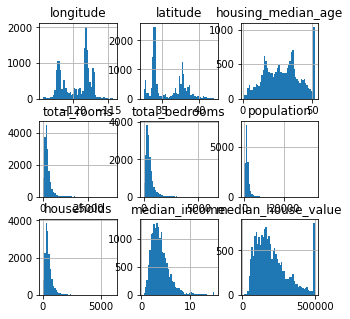

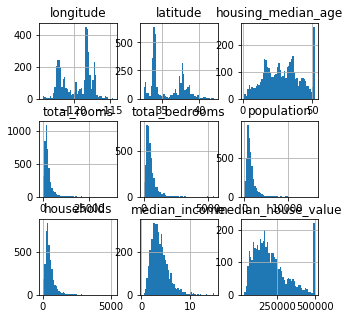

In [13]:
##### Gehen wir tiefer:

# Testdatensatz erstellen und genauer reingucken:

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 1234)

%matplotlib inline
train_set.hist(bins = 50, figsize= (5,5))
test_set.hist(bins = 50, figsize= (5,5))
plt.show()


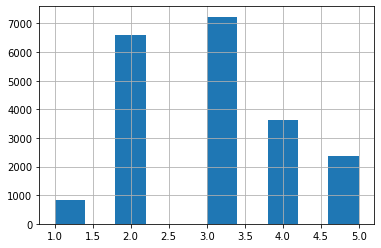

In [14]:
# Verteilung sieht gut aus aber nicht stratifiziert : daher vorher stratifizieren:
# Buch sagt:
# Kategorien anhand des Median_incomes erstellen, Klassieren nach 1-5: min 1; max 5
# dazu ein groupby describe auf den median income um sich die Werte besser anzugucken.
# Dann ein stratset bilden und die verteilung prüfen:


housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0.,1.5,3.0,4.5,6.,np.inf],
                               labels = [1,2,3,4,5])

housing["income_cat"].hist()



In [15]:
# Anteile:
housing["income_cat"].value_counts()/ len(housing["income_cat"])


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
housing.groupby(["income_cat"]).describe().loc[:,['median_income']]

median_income                      ...                            
                   count      mean       std  ...      50%       75%      max
income_cat                                    ...                            
1                  822.0  1.211262  0.236404  ...  1.26295  1.402175   1.5000
2                 6581.0  2.325457  0.406612  ...  2.34820  2.664800   3.0000
3                 7236.0  3.686134  0.426957  ...  3.66070  4.050725   4.5000
4                 3639.0  5.132392  0.410946  ...  5.09230  5.462350   6.0000
5                 2362.0  7.722912  1.931465  ...  7.03275  8.242750  15.0001

[5 rows x 8 columns]

In [17]:
### STRAT Sample ziehen:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1234)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [18]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
# Anteile der Einkommenskategorien:

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
# Verteilung okay, entfernen der neuen Spalte:

for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis = 1, inplace = True)

In [20]:
# -- LEER --

In [21]:
# Kopie des Strat_train Sets erstellen für später:

housing_train = strat_train_set.copy()

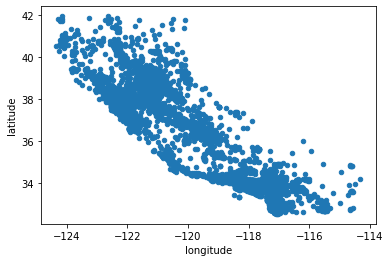

In [22]:
# Visualisieren von geografischen Daten: (nachfolgend basics)

# Mit Längen- und breitengrad:

housing_train.plot(kind = 'scatter', x = 'longitude', y ='latitude')

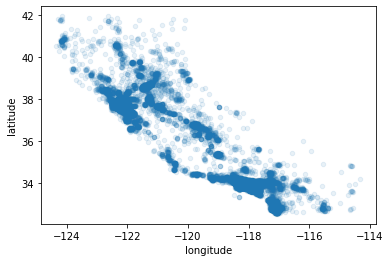

In [23]:
# das sieht nach californien aus.
# alpha auf 0.1 setzen um dichte zu erkennen:

housing_train.plot(kind = 'scatter', x = 'longitude', y ='latitude', alpha = 0.1)
# entspricht darstellung von gebieten mit hoher dichte.

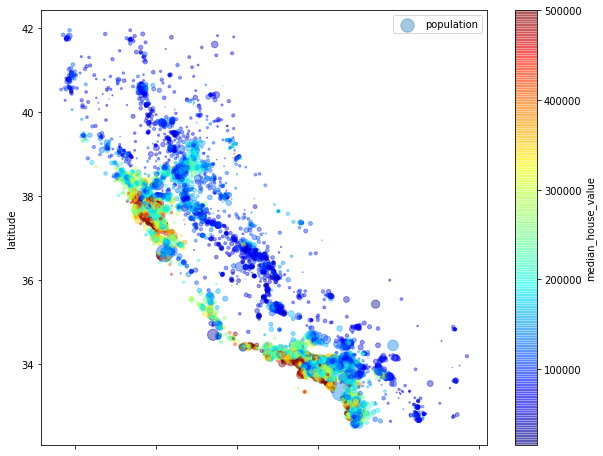

In [24]:
# Gut zu erkennen: Eureka oben links die Ecke, SF im mittleren Bereich, unten im süden dann LA und San Diego(?) 
# Hinzufügen der Immobilienpreise:
  # Radius eines Kreises = Bevölkerung eines Bizirks.
  # Farbe entspricht preis von Blau = min : Rot = max.

housing_train.plot(kind = 'scatter', x = 'longitude', y ='latitude', alpha = 0.4,
             s = housing_train["population"]/100, label = "population", figsize = (10,8),
             c = "median_house_value", cmap = 'jet', colorbar = True)
plt.legend()

In [25]:
# yaa, jeder liebt die küste und ja, dies kann für Feature-Engineering als Merkmal hinzugefügt werden.
# Zielvar ist Immobilienwert. Daher Korrelation gezielt auf Target prüfen:
# + Scatter Plot:

In [26]:
corr_matrix = housing_train.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690234
total_rooms           0.132246
housing_median_age    0.099445
households            0.064742
total_bedrooms        0.049180
population           -0.023116
longitude            -0.047607
latitude             -0.144179
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cf6d50150>,
      dtype=object)

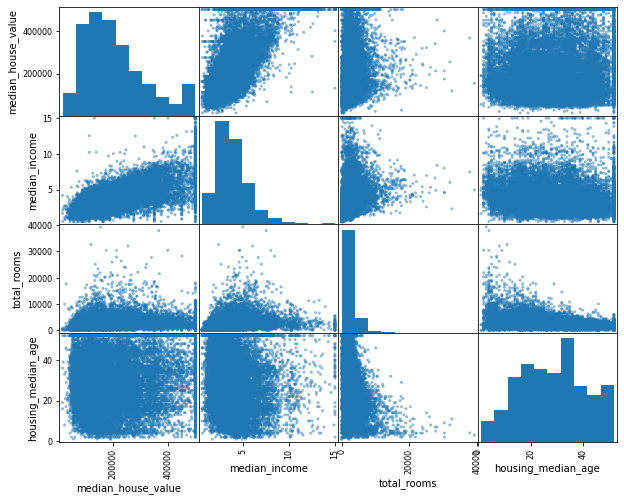

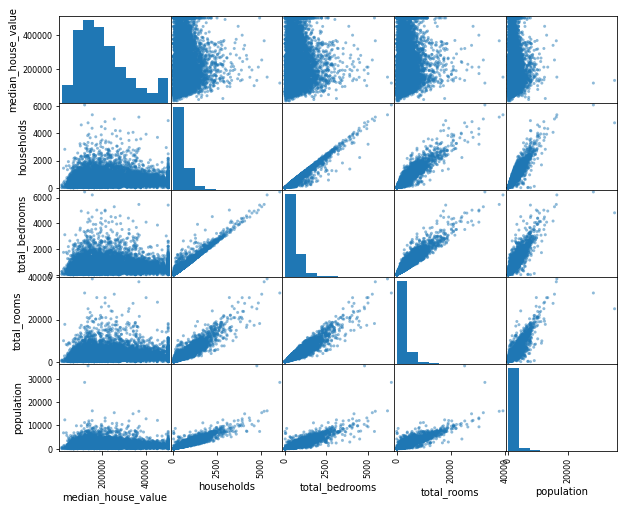

In [27]:
from pandas.plotting import scatter_matrix
attrib_a = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attrib_a], figsize = (10,8))

attrib_b = ["median_house_value","households","total_bedrooms","total_rooms","population"]
scatter_matrix(housing[attrib_b], figsize = (10,8))


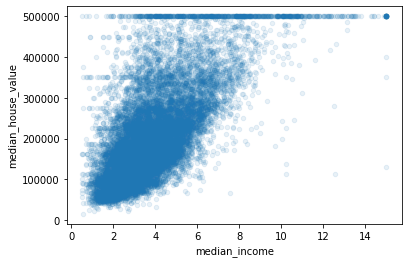

In [28]:
# median_income hat bereits eine hohe corr mit median_house_value:

housing_train.plot(kind="scatter", x= "median_income", y="median_house_value", alpha = 0.1)

In [29]:
# Die horizontalen bei 50, 45, 35 etc sind nervige artefakte. eventl werden sie vom algo reproduziert.
# Households, bedrooms , total rooms und pop korrelieren ebenfalls recht stark untereinander.
  # Hier kann man neue Features erstellen:
    # Total Rooms per Haushalt
    # Bedrooms per room 
    # Population von Haushalt

housing_train["rooms_per_household"] = housing_train["total_rooms"] / housing_train["households"]
housing_train["bedrooms_per_room"] = housing_train["total_bedrooms"] / housing_train["total_rooms"] 
housing_train["pop_per_household"] = housing_train["population"] / housing_train["households"]


In [30]:
corr_matrix = housing_train.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.690234
rooms_per_household    0.153254
total_rooms            0.132246
housing_median_age     0.099445
households             0.064742
total_bedrooms         0.049180
pop_per_household     -0.022424
population            -0.023116
longitude             -0.047607
latitude              -0.144179
bedrooms_per_room     -0.261941
Name: median_house_value, dtype: float64

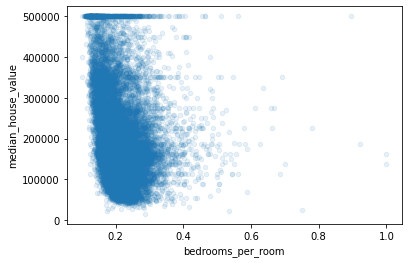

In [31]:
housing_train.plot(kind="scatter", x= "bedrooms_per_room", y="median_house_value", alpha = 0.1)

# Die Kennzahl suggeriert, dass Wohnungen/Immobilien mit einem geringeren Schlafzimmer zu Zimmer Anteil in der Regel teurer sind.
# Die Aufteilung ist mir persönlich nicht so geläufig, sollte diese explizite Einteilung aber vorwegnehmen, dass Schlafzimmer in der Regel
# kleiner sind als Wohnzimmer, dann würde dies durchaus Sinn machen, da die restlichen Anteile für eine größere Fläche der Wohnung sprechen.
# Visualisiert ist die Korrelation jedoch immernoch sehr schwach.
# Darüber hinaus zeigt sich mit rooms per household ein positiver Trend : das macht Sinn da "Je größer desto teurer".

In [32]:
# -- Leer --

In [33]:
# ML-Algos vorbereiten:

In [34]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()


In [35]:
# Simples imputen des medians für NA -Werte in total bedrooms:
# (laut Buch, anmerkung, KNN oder BagImpute wäre es in R gewesen. Pendant für python suchen)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")

# Kat Daten entfernen:
housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)

imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  435.    , 1168.    ,
        410.    ,    3.5313])

In [36]:
housing_num.median().values
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [37]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 11989 to 10368
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [38]:
# kat daten:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
11989,INLAND
7285,<1H OCEAN
4028,<1H OCEAN
16572,INLAND
9052,INLAND
5588,<1H OCEAN
1327,INLAND
14630,NEAR OCEAN
5313,<1H OCEAN
12344,INLAND


In [39]:
# Text zu Zahl-Konverter

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

print(housing_cat_encoded[:10])
print()
print(ordinal_encoder.categories_) # via instanz die categories abrufen


[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [4.]
 [0.]
 [1.]]

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [40]:
# 1-Hot Encoder:

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot # sparse matrix, aufrufen mit .toarray() für np-array

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
## Eigene Transformer schreiben:
# .. siehe fav pipeline
# und in Folge, die Klasse Pipeline von Scikit:

# Analog zum Beispiel oben erstellen wir einen eigenen Transformer, welcher die oben erstellten attribute automatisch generiert:
    # Total Rooms per Haushalt
    # Bedrooms per room 
    # Population von Haushalt

# Der Transformer benötigt drei methods:
  # fit()
  # transform()
  # fit_transform() // dieser wird durch TransformerMixin als Basis-Klasse atuomatisch bereitgestellt.

  # Mithilfe des BaseEstimator erhalten wir zusätzlich die Methoden get_params() und set_params()

import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Spaltenzahl für Übergabe vorbereiten:

rooms, bedrooms, population, households = 3,4,5,6


class CustomTransformer(BaseEstimator, TransformerMixin):
  """Constructor erstellen"""
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y = None):
    """Estimator Methode"""
    return self
  
  def transform(self, X, y = None):
    """Die 3 Variablen erstellen"""
    rooms_per_household = X[:, rooms] / X[:, households]
    population_per_household = X[:, population] / X[:,households]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms] / X[:, rooms]
      # Wenn kein Bedroom, übergebe nur die anderen beiden Vars, concat entlang der zweiten Achse zur Eingabe X
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attrib_adder = CustomTransformer(add_bedrooms_per_room = False)
        



In [42]:
# Skalieren von Merkmalen:

# (wie immer nur auf Train, damit kein Data-Leakage)

### Pipelines zu transformation:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy = 'median')), ### den hatten wir oben bereits angewendet
                         ('attrib_adder', CustomTransformer()), # eben oben erstellt.
                         ('std_scaler', StandardScaler()),
                         ]) # der eigentliche scaler - minmax range 0-1

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [43]:
#### kategoriale Pipeline erstellen und zu einer gesamten Transfo-Pipeline ändern

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num) # df nur numerisch

cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),  ### numerische Part
                                   ("cat", OneHotEncoder(), cat_attribs), ### kategroialer Part
])

housing_prepared = full_pipeline.fit_transform(housing)


In [44]:
# Modell auswählen und trainieren

# Lineare Regression
!pip install pytictoc # für gcolab immer mit ausführen

from pytictoc import TicToc # Zeit messen analog zu R tictoc

from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
t = TicToc()

t.tic()
linReg.fit(housing_prepared, housing_labels)
t.toc()

Elapsed time is 0.034710 seconds.


In [45]:

# kurz checken:

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [46]:
print("Vorhersagen", linReg.predict(some_data_prepared),
      "Labels", list(some_labels))

# naja klar.

Vorhersagen [157814.35949023 152461.72179181 291647.9015834  138677.6463232
  72478.32856933] Labels [182900.0, 125000.0, 457300.0, 152500.0, 225000.0]


In [47]:
# MSE:

from sklearn.metrics import mean_squared_error

housing_prediction = linReg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_prediction)

# RMSE: (Wurzel aus, gleiche Einheit wie Target)

lin_rmse = np.sqrt(lin_mse)

print(lin_rmse, "in $ - durchschnittliche abweichung zum eigentlichen preis")
print()
print(housing_labels.describe())

# PS wo sind meine regressionscoeffizienten? P-Vals und T-test-statistics? .... Das wird ein langer weg. 


68057.28673678356 in $ - durchschnittliche abweichung zum eigentlichen preis

count     16512.000000
mean     206582.658733
std      115192.350792
min       14999.000000
25%      119300.000000
50%      179800.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [48]:
# okay, wow direkt zu Decision Trees:

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [49]:
housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_prediction)

tree_rmse = np.sqrt(tree_mse)

tree_rmse

# nice variance => Overfit // siehe variance-bias-trade-off

0.0

In [50]:
# Kreuzvaliderung ...Note: bis jetzt noch keine Feature-Importance gesehen.... hoffentlich kommt das noch, sonst stackoverflow(?)

# k-foldcv

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv =10)

tree_rmse_scores = np.sqrt(-scores)


In [51]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("stdabw: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [70430.64036492 68855.25015838 69504.3732488  69947.76577337
 67228.95877816 68416.41681148 69576.41500752 68184.32448824
 73715.36370361 72568.54239973]
Mean:  69842.80507342175
stdabw:  1885.7629663497762


In [52]:
## Scores des linearen Regressionsmodells:

lin_scores = cross_val_score(linReg, housing_prepared, housing_labels,
                             scoring = "neg_mean_squared_error", cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores:  [68389.43180601 70373.45786321 66020.47762522 66271.91803849
 70157.61303067 66368.66988921 66724.75213344 71055.83494249
 67028.78990268 72220.54660892]
Mean:  68461.14918403528
stdabw:  2181.7499565071066


In [53]:
# Lineare Regression ist auf Basis des mittleren Fehlers und der enge der Standardabweichung besser - dennoch nicht viel.

In [54]:
### Schnelles Modell mit Randomforest(regressor)

from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor()

t = TicToc()


t.tic()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring = "neg_mean_squared_error", cv = 10) # das könnte dauern(?)

forest_rmse_scores = np.sqrt(-forest_scores)

print(t.toc()) # Dauer anzeigen
print()
print(display_scores(forest_rmse_scores))







Elapsed time is 163.877523 seconds.
None

Scores:  [48946.61606209 49004.97490032 48292.85269661 47377.77990308
 48780.43732818 49068.12362768 50452.14807636 49913.99600648
 50294.52452086 51746.49578851]
Mean:  49387.7948910182
stdabw:  1176.719395330608
None


In [55]:
# 173 sek, auf wie vielen Kernen läuft colab eigentlich?

import os

os.cpu_count()

# uh nur 2 Kerne

2

In [56]:
### okay zurück zum rmse:

(49488.13-68423.29)/68423.29
# ~30% Verbesserung in Mittlerem Fehler und Standard

-0.2767355968998275

In [57]:
### Modelle als großes nparray abspeichern - für den späteren Vergleich:

import joblib

filename_linreg = 'linear_model1.sav'
filename_dectree = 'dectree_model1.sav'
filename_rforest = 'rforest_model1.sav'

joblib.dump(linReg, filename_linreg)
joblib.dump(tree_reg, filename_dectree)
joblib.dump(forest_reg, filename_rforest)

['rforest_model1.sav']

In [58]:
## Modelloptimierung (miniatur version)

# Via GridSearchCV hyperparameter-tuning betreiben: Zielmodell ist RandomForestRegressor

from sklearn.model_selection import GridSearchCV
param_grid = [
              {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}, ## Erstes Dict
              {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}, ## Zweites Dict - d.h. mehr flexibiltät in den Params zu R
              ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True, refit = True) # der Regressor wird quasi in die Gridsearch Funkrion übergeben
# inkl der parameter; die gesamte Scorefunktion wird dann ausgeführt.

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
## Feature-Check:

grid_search.best_params_
# direkt das maximum mit 30 Features ausgesucht? eventl höhere Werte probieren

# Zugriff auf besten Estimator:

grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)